# Classification

In [1]:
%%HTML
<link rel="stylesheet" type="text/css" href="custom.css">

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(10,7.5)})
plt.rcParams['figure.figsize'] = (10, 7.5)

# Background 

We are working for the environmental department to lower air pollution. We want to encourage citizens to commute via trains rather than driving cars. We'll start with some low cost data collection such as their commute times and commute cost.


# What does the dataset look like?

In [3]:
df = pd.read_csv("sydney.csv")
df.head()

,cartime,carcost,traintime,traincost,choice
0,70,50,64,39,TRAIN
1,50,230,60,32,TRAIN
2,50,70,58,40,CAR
3,60,108,93,62,CAR
4,70,60,68,26,TRAIN


In [4]:
df.describe()

,cartime,carcost,traintime,traincost
count,333.000000,333.000000,333.000000,333.000000
mean,45.465465,57.753754,66.321321,38.219219
std,18.308670,33.551875,19.296561,14.497507
min,10.000000,8.000000,3.000000,7.000000
25%,30.000000,32.000000,56.000000,28.000000
50%,45.000000,50.000000,67.000000,36.000000
75%,60.000000,70.000000,76.000000,46.000000
max,95.000000,230.000000,145.000000,97.000000


# Questions?

Given the features of this dataset some questions we may want to ask.

* Do people prefer to travel by train or car? 
* How does travel time effect this prefence?
* How does price effect this prefence?
* If price of either mode of transport changes how will it effect there choice?


# Other factors

 Other than price and transport time what other factors may influence these choices

* Avaliablity and usage of other modes of transport
* Location of work and home.
* Distance from the mode of transport 
* Weather for each day
* Quality of transport - how regluar does it run, is it busy or not.

If we had data on these factors we could do a more sophisticated analysis 
 

# Data exploration

In this section well make some plots to get a better idea of what the data looks like.


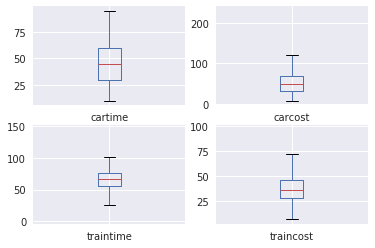

In [5]:
df.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()

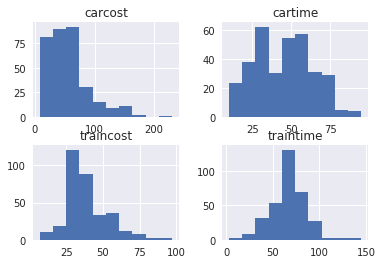

In [6]:
df.hist()
plt.show()

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

ImportError: No module named 'pandas.plotting'

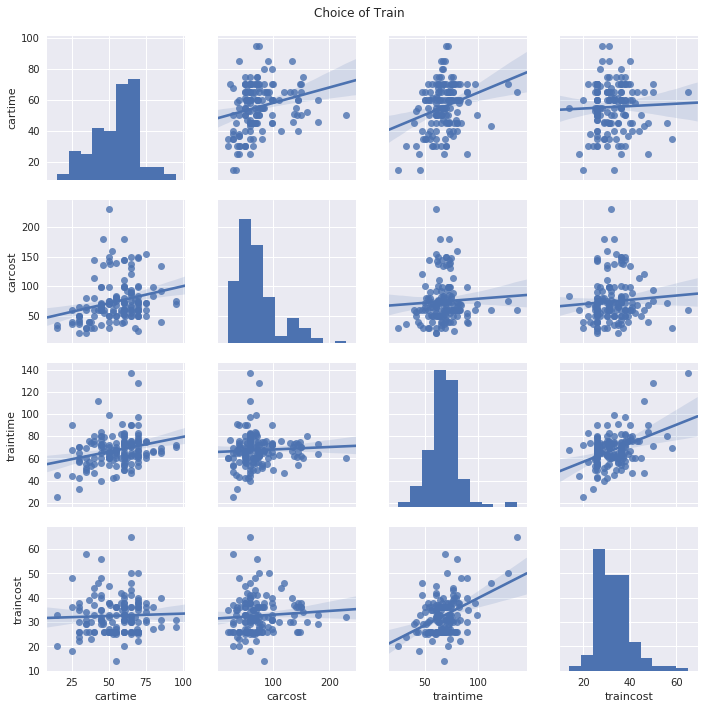

In [11]:
g = sns.PairGrid(df.loc[df['choice'] == "TRAIN"])
g = g.map_diag(plt.hist)
g = g.map_offdiag(sns.regplot)
g.fig.suptitle("Choice of Train")
g.fig.subplots_adjust(top=.94)

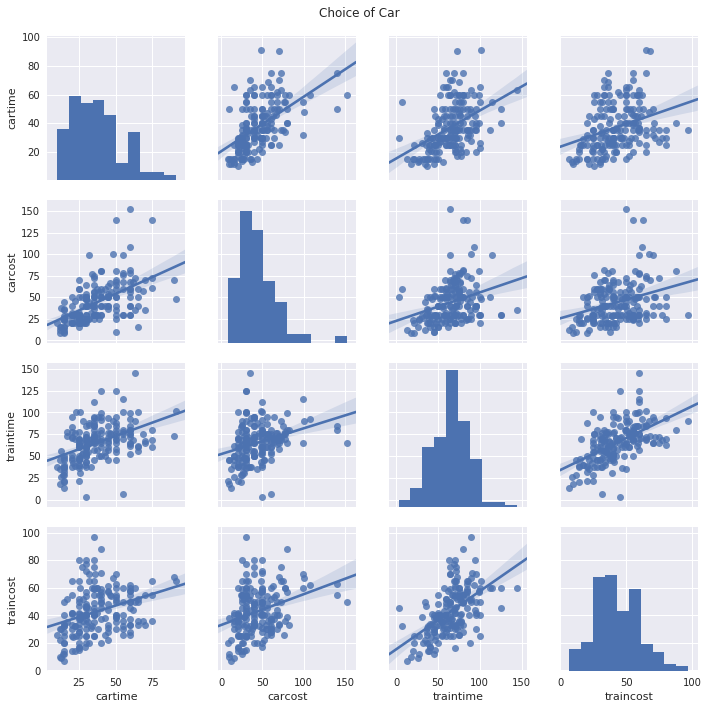

In [14]:
g = sns.PairGrid(df.loc[df['choice'] == "CAR"])
g = g.map_diag(plt.hist)
g = g.map_offdiag(sns.regplot)
g.fig.suptitle("Choice of Car")
g.fig.subplots_adjust(top=.94)

In [ ]:
g = sns.pairplot(df,hue="choice",diag_kind={"kde"})
g = g.map_offdiag(sns.regplot)
g.fig.suptitle("Train and Car")
g.fig.subplots_adjust(top=0.94)

In [ ]:
corr = df.corr()
ax = plt.axes()
g = sns.heatmap(corr,ax=ax,annot=True)
ax.set_title('Correlation between variables')

# Models

3 different type of models:

* Logstic regression 
* SVM (Support vector machine)
* Multilayer perceptron (neural network)

Besides, tree-based models can be used

* Decision Tree
* Random Forest
* Gradient Boosting Machine

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, test_size=0.2)
X_train = train[['cartime', 'carcost', 'traintime', 'traincost']]
y_train =train["choice"]
X_test = test[['cartime', 'carcost', 'traintime', 'traincost']]
y_test = test["choice"]

## Logstic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
logistic_regression.score(X_test,y_test)

In [ ]:
confusion_matrix(y_test,y_pred)

## SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)

# Decision Tree

In [ ]:
from sklearn import tree
modelDT = tree.DecisionTreeClassifier()
modelDT = modelDT.fit(X_train,y_train)
y_pred = modelDT.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelRF = RandomForestClassifier(n_estimators=10, max_depth=None,
                                 min_samples_split=2, random_state=0)
modelRF = modelRF.fit(X_train,y_train)
y_pred = modelRF.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
modelRF.feature_importances_

# Gradient Boosting Machine

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
modelGBM = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0)
modelGBM = modelGBM.fit(X_train,y_train)
y_pred = modelGBM.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
modelGBM.feature_importances_# feature importance

## Neural Network

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train_onehot = to_categorical(encoder.fit_transform(y_train))
y_test_onehot = to_categorical(encoder.fit_transform(y_test))

input_shape = (X_train.shape[1],)
num_classes = 2

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(256,activation='relu',input_shape=input_shape))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(256,activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(num_classes,activation='softmax'))
nn_model.summary()

In [ ]:
nn_model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [ ]:
#may take long time without a gpu
history = nn_model.fit(X_train, y_train_onehot,
                    batch_size=256,
                    epochs=8,
                    verbose=1,
                    validation_data=(X_test, y_test_onehot))
# score = model.evaluate(X_test, y_test_onehot, verbose=0)

In [ ]:
y_pred = nn_model.predict_classes(X_test)
accuracy_score(y_pred,encoder.fit_transform(y_test))

From this we can we that the model isn't training correctly it's alway predicting 0 or car. I need more data to train a neural network, and also could tweak the architecture.

In [ ]:
y_test_binary = encoder.fit_transform(y_test)
confusion_matrix(y_pred,y_test_binary)

# Interpreting results

* Which model performed best? 
* What variable is most important?
* When does the model misclassify?
* What is its accuracy?
* What predictions can we make with our best model?

# Cross Validation to compare model

In [ ]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [ ]:
# Spot Check Algorithms
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=2)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


## Recommendation

Given the data on hand our, we would suggest to decreasing train price

In [ ]:
old_price = X_test.mean()
old_price

In [ ]:
new_price = X_test.mean()
new_price[3] = new_price[3] - 10

In [ ]:
logistic_regression.predict_proba(old_price.values.reshape(1,-1))

In [ ]:
logistic_regression.predict_proba(new_price.values.reshape(1,-1))

So if we could cut train prices by a third we could expect to see a ~ 30% increase in train usage.

## ROC Curves

 ROC curves are used in binary classification to comapre how well a model performed

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

In [ ]:
#prediction for all models
y_pred_log = logistic_regression.predict(X_test)
y_pred_svm = svc.predict(X_test)
y_pred_nn = nn_model.predict_classes(X_test)

#Convert to binary labels
y_pred_log =  encoder.fit_transform(y_pred_log)
y_pred_svm = encoder.fit_transform(y_pred_svm)
y_test_binary = encoder.fit_transform(y_test)

In [ ]:
fig,ax = plt.subplots()

for pred,label in zip([y_pred_log,y_pred_svm,y_pred_nn],["Log","SVM","NN"]):
    score = roc_auc_score(y_test_binary,pred)  
    fpr,trp,_ = roc_curve(y_test_binary,pred)
    ax.plot(fpr,trp, label= "%s - %1f" % (label,score)  )

plt.legend(loc="best")

The best model has the highest AUC (area under the curve).

## Best model

Since logstic regression did so well lets, have a closer look at the probablity distributions of it's predictions

In [ ]:
y_pred = logistic_regression.predict_proba(X_test)
ax = sns.kdeplot(y_pred[:,0],shade=True)
ax.set_title("Probablity distribution of train and car")

In [ ]:
y_pred_train = y_pred[y_test == "TRAIN"]
y_pred_car = y_pred[y_test == "CAR"]

fig, ax = plt.subplots()
sns.kdeplot(y_pred_car[:,0],ax=ax ,shade=True, label="Car")
sns.kdeplot(y_pred_train[:,0],ax=ax,shade = True,label ="Train")
ax.set_title("Probability distribution of predictions for train vs car")

## Accuracy and confusion matrix



In [ ]:
y_pred = logistic_regression.predict(X_test)
accuracy_score(y_test,y_pred)

First row is car, second row train. 

In [ ]:
confusion_matrix(y_test,y_pred)

## Model Information

In [ ]:
logistic_regression.coef_

In [ ]:
np.argmax(np.abs(logistic_regression.coef_))

In [ ]:
df.columns[3]

# Reference: Textbook Marketing Data Science

In [ ]:
import statsmodels.api as sm

In [ ]:
my_logit_model = sm.Logit(y,x)
# fit the model to the full data set
my_logit_model_fit = my_logit_model.fit(y,x)
print(my_logit_model_fit.summary())

In [ ]:
# Predicting Customer Retention (Python)

# prepare for Python version 3x features and functions
from __future__ import division, print_function

# import packages for text processing and machine learning
import pandas as pd  # DataFrame structure and operations
import numpy as np  # arrays and numerical processing
import matplotlib.pyplot as plt  # 2D plotting
import patsy  # translate model specification into design matrices

from sklearn import svm  # support vector machines
from sklearn.ensemble import RandomForestClassifier  # random forests
from sklearn.naive_bayes import GaussianNB  # naive Bayes

# import user-defined module
#import evaluate_classifier as eval

# read in comma-delimited text file and create data frame
# there are blank character fields for missing data
# read them as character fields initially
att = pd.read_csv("att.csv")
print(att.head())

# select variables of interest for modeling
attprelim = pd.DataFrame(att, columns = ['pick','usage','reachout','card'])

# use dictionary objects for mapping to 0/1 binary codes
pick_to_binary = {'ATT' : 0, 'OCC' : 1}
attprelim['pick'] = attprelim['pick'].map(pick_to_binary)
yes_to_binary = {'NO' : 0, 'YES' : 1}
attprelim['reachout'] = attprelim['reachout'].map(yes_to_binary)
attprelim['card'] = attprelim['card'].map(yes_to_binary)

# work with complete cases only
attwork = attprelim.dropna()
print(attwork.head())

# specify form of predictive model
attmodel = 'pick ~ usage + reachout + card'

# convert R-like formula into design matrix needed for statsmodels        
y,x = patsy.dmatrices(attmodel, attwork, return_type = 'dataframe')